In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

2023-12-04 16:19:22.612054: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import datasets, layers, models

#### Loading the dataset

In [3]:
# setting class names
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
#loading the dataset
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

#### Normalizing the Images

In [4]:
x_train=x_train/255.0
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_test=x_test/255.0
x_test.shape

(10000, 32, 32, 3)

##### Randomly Checking a image

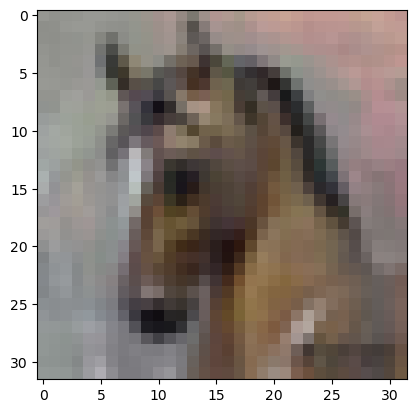

In [7]:
plt.imshow(x_test[210])

### Building a Convolutional Neural Network

In [8]:
cifar10_model=tf.keras.models.Sequential()

In [9]:
# First Layer
cifar10_model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu", input_shape=[32,32,3]))

In [10]:
# Second Layer
cifar10_model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu"))

In [11]:
# Max Pooling Layer
cifar10_model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))

In [12]:
# Third Layer
cifar10_model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu"))

In [13]:
# Fourth Layer
cifar10_model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu"))

In [14]:
# Max Pooling Layer
cifar10_model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))

In [15]:
# Flattening Layer
cifar10_model.add(tf.keras.layers.Flatten())

In [16]:
# Droput Layer
cifar10_model.add(tf.keras.layers.Dropout(0.5,noise_shape=None,seed=None))

In [17]:
# Adding the first fully connected layer
cifar10_model.add(tf.keras.layers.Dense(units=128,activation='relu'))

In [18]:
# Output Layer
cifar10_model.add(tf.keras.layers.Dense(units=10,activation='softmax'))

In [19]:
cifar10_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                   

#### Compiling the Model

In [20]:
cifar10_model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["sparse_categorical_accuracy"])

#### Training the Model

In [ ]:
cifar10_model.fit(x_train,y_train,epochs=6)

Epoch 1/6
1563/1563 [==============================] - 268s 170ms/step - loss: 1.3999 - sparse_categorical_accuracy: 0.4946
Epoch 2/6
1563/1563 [==============================] - 258s 165ms/step - loss: 0.9950 - sparse_categorical_accuracy: 0.6477
Epoch 3/6
 428/1563 [=======>......................] - ETA: 3:58 - loss: 0.8696 - sparse_categorical_accuracy: 0.6907

In [22]:
test_loss, test_accuracy = cifar10_model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.6763 - sparse_categorical_accuracy: 0.7808


In [23]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.7807999849319458
